# Exploring Seattle Weather

**Learning Objective:** Apply data visualization practices to study the weather in Seattle.

In this notebook, we will create visualizations to explore weather data for Seattle, taken from NOAA. The dataset is a CSV file with columns for the temperature (in Celsius), precipitation (in centimeters), wind speed (in meter/second), and weather type. We have one row for each day from January 1st, 2012 to December 31st, 2015. This notebook is based on the Seattle weather example in the [Altair](https://altair-viz.github.io/tutorials/exploring-weather.html) and [Vega-Lite](https://vega.github.io/vega-lite/tutorials/explore.html) documentation.

## Imports

In [1]:
import altair as alt
alt.data_transformers.enable('json')
from vega_datasets import data

## Data

Load the Seattle weather data from Altair:

In [2]:
df = data.seattle_weather()

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


## Explore

Let’s start by looking at the precipitation, using tick marks to see the distribution of precipitation values:

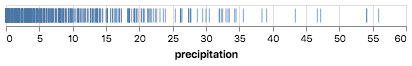

In [4]:
alt.Chart(df).mark_tick().encode(
    x='precipitation'
)

It looks as though precipitation is skewed towards lower values; that is, when it rains in Seattle, it usually doesn’t rain very much. It is difficult to see patterns across continuous variables, and so to better see this, we can create a histogram of the precipitation data. For this we first discretize the precipitation values by adding a binning to x. Additionally, we set our encoding channel y with the special field `*` that is aggregated with `count`. The result is a histogram of precipitation values:

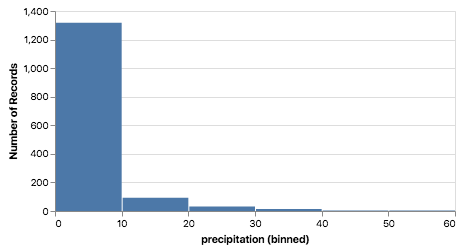

In [5]:
alt.Chart(df, width=400, height=200).mark_bar().encode(
    alt.X('precipitation', bin=True),
    alt.Y('count(*):Q')
)

Next, let’s look at how precipitation in Seattle changes throughout the year. Altair natively supports dates and discretization of dates when we set the type to temporal (shorthand `T`). For example, in the following plot, we compute the total precipitation for each month. To discretize the data into months, we set the keyword `timeUnit="month"`:

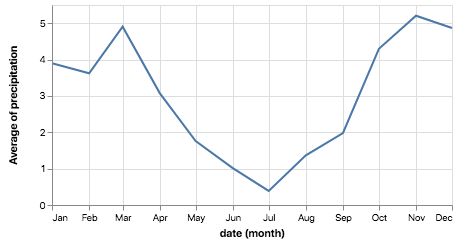

In [6]:
alt.Chart(df, width=400, height=200).mark_line().encode(
    alt.X('date:T', timeUnit='month'),
    alt.Y('average(precipitation)')
)

This chart shows that in Seattle the precipitation in the winter is, on average, much higher than summer (an unsurprising observation to those who live there!). By changing the mapping of encoding channels to data features, you can begin to explore the relationships within the data.

When looking at precipitation and temperature, we might want to aggregate by year and month (`yearmonth`) rather than just month. This allows us to see seasonal trends, with daily variation smoothed out. We might also wish to see the maximum and minimum temperature in each month:

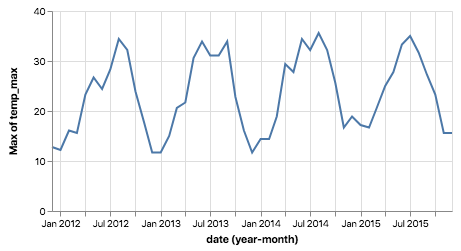

In [7]:
alt.Chart(df, width=400, height=200).mark_line().encode(
    alt.X('date:T', timeUnit='yearmonth'),
    alt.Y('max(temp_max)'),
)

In this chart, it looks as though the maximum temperature is increasing from year to year over the course of this relatively short baseline. To look closer into this, let’s instead look at the mean of the maximum daily temperatures for each year:

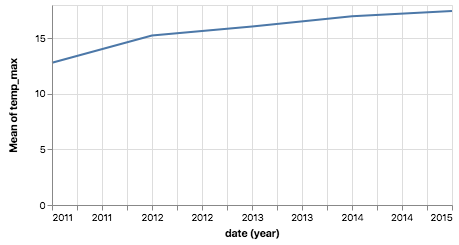

In [8]:
alt.Chart(df, width=400, height=200).mark_line().encode(
    alt.X('date:T', timeUnit='year'),
    alt.Y('mean(temp_max)'),
)

And in fact, the chart indicates that yes, the annual average of the daily high temperatures increased over the course of these four years, a fact that you can confirm for minimum daily temperatures as well.

You might also wonder how the variability of the temperatures changes throughout the year. For this, we have to add a computation to derive a new field. You can do with with Pandas:

In [9]:
df['temp_range'] = df.temp_max - df.temp_min

Now, let's look at the temperature range over time:

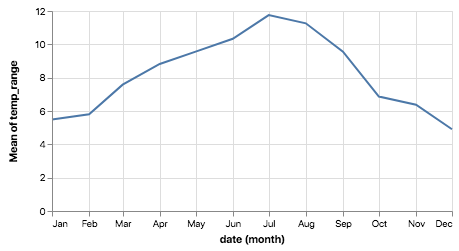

In [10]:
alt.Chart(df, width=400, height=200).mark_line().encode(
    alt.X('date:T', timeUnit='month'),
    y='mean(temp_range):Q'
)

Next we will explore the weather field, which encodes a categorical variable describing the weather on a given day. We might wish to know how different kinds of weather (e.g. sunny days or rainy days) are distributed throughout the year. To answer this, we can discretize the date by month and then count the number of records on the y-Axis. We then break down the bars by the weather type by mapping this column to a color channel. When a bar chart has a field mapped to color, Altair will automatically stack the bars atop each other:

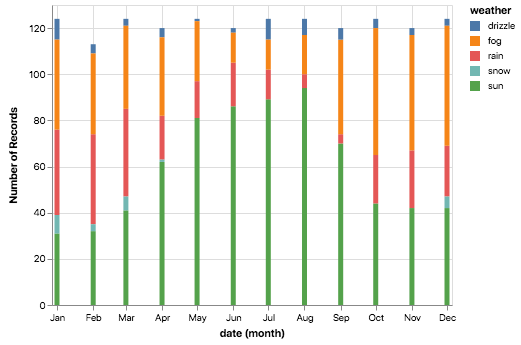

In [20]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('date:T', timeUnit='month'),
    y='count()',
    color='weather',
)

The default color palette’s semantics might not match our expectation. For example, we probably do not expect “sun” (sunny) to be purple. We can tune the chart by providing a color scale range that maps the values from the weather field to meaningful colors, using standard hex color codes:

In [21]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
              range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])

This scale can be passed to the color encoding to be applied to the plot style. In addition, we can customize the titles for the axis and legend to make the meaning of the plot more clear:

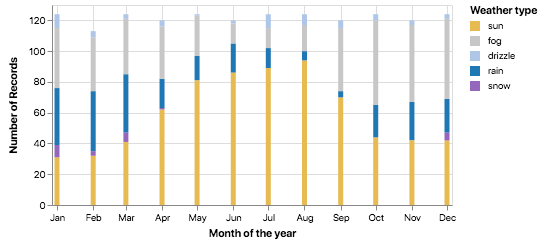

In [22]:
alt.Chart(df, width=400, height=200).mark_bar().encode(
    x=alt.X('date:T', timeUnit='month', axis=alt.Axis(title='Month of the year')),
    y='count():Q',
    color=alt.Color('weather', legend=alt.Legend(title='Weather type'), scale=scale),
)

Combining the above ideas lets us create any number of flexible visualizations of this dataset. For example, here is a plot that uses the customizations we have developed above to explore the relationship between weather, precipitation, maximum temperature, and temperature range, configured to use a larger canvas:

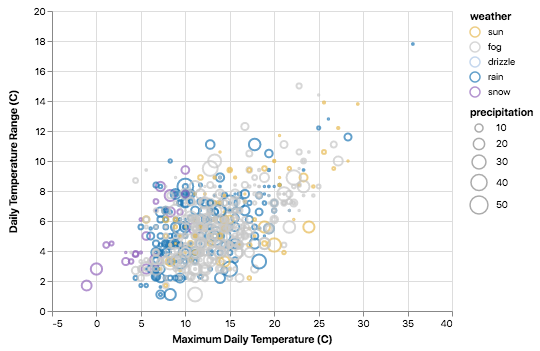

In [25]:
alt.Chart(df).mark_point().encode(
    alt.X('temp_max', axis=alt.Axis(title='Maximum Daily Temperature (C)')),
    alt.Y('temp_range', axis=alt.Axis(title='Daily Temperature Range (C)')),
    alt.Color('weather', scale=scale),
    size='precipitation',
).interactive()

This gives us even more insight into the weather patterns in Seattle: rainy and foggy days tend to be cooler with a narrower range of temperatures, while warmer days tend to be dry and sunny, with a wider spread between low and high temperature.